In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Advertising.csv')


In [3]:
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [5]:
data.shape

(200, 4)

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

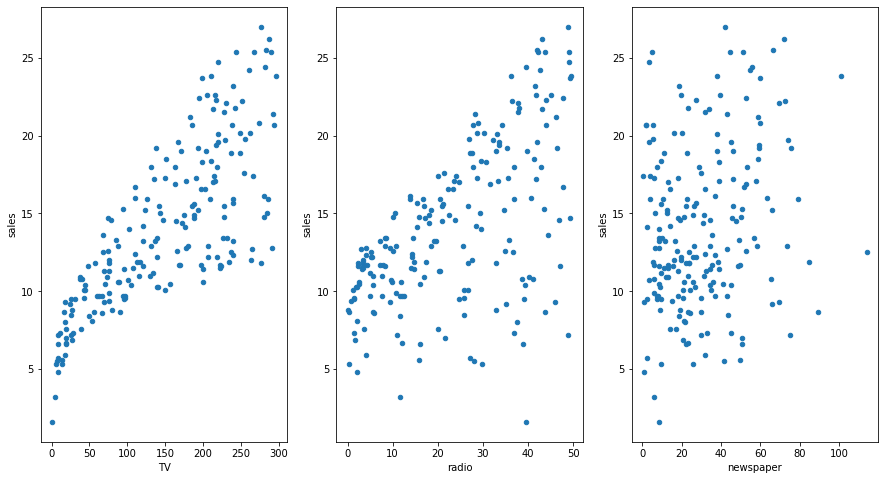

In [41]:
fig, axs = plt.subplots(1, 3)   #(rows,cols)
data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(15,8))
data.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])


<AxesSubplot:>

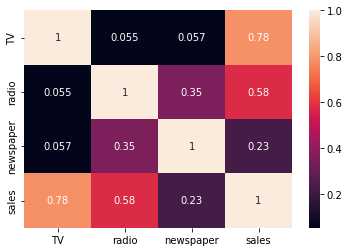

In [7]:
sns.heatmap(data.corr(), annot = True)

In [8]:
feature_cols = ['TV']
x = data[feature_cols] # Features   data,TV
y = data.sales # Target variable

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 100,test_size= 0.20)  # 75 Train, 25 Test

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 1)
(40, 1)
(160,)
(40,)


In [12]:
# X_train

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
my_first_model = LinearRegression()

In [15]:
# training
my_first_model.fit(X_train,y_train)

LinearRegression()

In [16]:
my_first_model.coef_   # return val of M or regression coeff

array([0.04610976])

In [17]:
my_first_model.intercept_  # C intercept

7.113008222196273

### Interpreting the coefficients

1. A unit increase in TV ad spending was associated with a .048 unit increase in Sales



### Inference
y = mx + c

You have the values of m and c. Given any value of x you can predict the value of y

In a new market my spend on TV is $50,000. I want you to tell me the sales generated due to this spend

In [18]:
0.045*50 + 7.11

9.36

In [19]:
Pred = my_first_model.predict(X_test)

In [20]:
Pred

array([ 7.47266432, 18.09635222, 13.3470473 , 17.15110221, 18.25773636,
       16.64850586, 13.53148632, 16.2242961 , 17.09115952, 17.10960343,
       12.51707168, 17.69519733,  9.70437654, 15.77242049, 11.13377899,
       11.45654728, 14.01563877, 14.96088877, 14.65195341, 12.31879973,
       17.01277294, 13.07961071, 16.12285464, 15.27443512, 15.6387022 ,
       17.27098757, 17.2479327 , 10.58507289, 15.6387022 , 12.78911924,
       10.26691557, 10.29458142, 12.69228876, 15.80008634,  9.41849605,
       12.66923388, 11.59487655, 14.87789121, 17.36781806, 16.02141317])

In [21]:
y_test

126     6.6
104    20.7
99     17.2
92     19.4
111    21.8
167    12.2
116    12.2
96     11.7
52     22.6
69     22.3
164    11.9
124    19.7
182     8.7
154    15.6
125    10.6
196     9.7
194    17.3
177    11.7
163    18.0
31     11.9
11     17.4
73     11.0
15     22.4
41     17.1
97     15.5
128    24.7
133    19.6
82     11.3
139    20.7
123    15.2
83     13.6
65      9.3
151    11.6
162    14.9
170     8.4
77     14.2
32      9.6
173    11.7
174    11.5
85     15.2
Name: sales, dtype: float64

To complete the supervised learning flow follow the below steps after fitting the model

In [22]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

### Evaluation on Train Data

In [23]:
my_linear_preds_train = my_first_model.predict(X_train)

print('MAE on Train Data :', mean_absolute_error(my_linear_preds_train,y_train))
print('MSE on Train Data :', mean_squared_error(my_linear_preds_train,y_train))
print('RMSE on Train Data :', np.sqrt(mean_squared_error(my_linear_preds_train,y_train)))
print('R-squared on Train Data :', my_first_model.score(X_train, y_train))

MAE on Train Data : 2.573087911854826
MSE on Train Data : 10.758643783900268
RMSE on Train Data : 3.280037161969399
R-squared on Train Data : 0.6197569503198974


### Evaluation on Test Data

In [24]:
my_model_preds = my_first_model.predict(X_test)

print('MAE on Test Data :', mean_absolute_error(my_model_preds,y_test))
print('MSE on Test Data :', mean_squared_error(my_model_preds,y_test))
print('RMSE on Train Data :', np.sqrt(mean_squared_error(my_model_preds,y_test)))
print('R-squared on Train Data :', my_first_model.score(X_test, y_test))

MAE on Test Data : 2.4983195821565403
MSE on Test Data : 9.687069547890871
RMSE on Train Data : 3.1124057492381794
R-squared on Train Data : 0.5441581483697225


### Multiple Linear Regression

In [25]:
# features = data[['TV','radio','newspaper']]
# target = data[['sales']]
feature_cols = ['TV', 'radio','newspaper']
x = data[feature_cols] # Independent var or Features
y = data.sales # Target variable

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 10, train_size = 0.80)

In [27]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


In [28]:
my_multiple_linear_model = LinearRegression()

In [29]:
my_multiple_linear_model.fit(X_train,y_train)

LinearRegression()

In [30]:
my_multiple_linear_model.coef_

array([ 0.0437726 ,  0.19343299, -0.00222879])

In [31]:
my_multiple_linear_model.intercept_

3.254097114418883

In [32]:
Pred1 = my_multiple_linear_model.predict(X_test)

In [33]:
Pred1

array([18.1625299 , 12.92663232, 18.0531098 , 23.64464668, 20.70438374,
       14.28227997, 14.94493548, 21.38232981, 21.17508238, 12.73110461,
       24.00312134,  7.21544071, 12.24762152, 19.24345998, 19.38241854,
       13.45643798, 19.6247089 ,  9.2531648 , 21.13268075, 20.90762408,
       15.53485445, 10.92529369, 22.82955184, 15.8122438 , 17.42515749,
        8.16218669, 11.89783444, 12.70337575, 21.74138085,  7.96215368,
       12.50099965, 20.45535282,  4.72120047,  4.72259288, 16.75292333,
       15.75804986,  6.74415499, 17.73477354,  9.01591827, 13.617599  ])

In [34]:
y_test

59     18.4
5       7.2
20     18.0
198    25.5
52     22.6
19     14.6
162    14.9
55     23.7
69     22.3
2       9.3
98     25.4
10      8.6
75      8.7
142    20.1
124    19.7
63     14.0
109    19.8
78      5.3
111    21.8
185    22.6
154    15.6
130     1.6
61     24.2
87     16.0
102    14.8
121     7.0
136     9.5
1      10.4
47     23.2
172     7.6
159    12.9
39     21.5
76      6.9
91      7.3
35     12.8
178    11.8
127     8.8
169    15.0
46     10.6
174    11.5
Name: sales, dtype: float64

### Evaluation on Train data

In [35]:
my_multiple_linear_preds_train = my_multiple_linear_model.predict(X_train)

print('MAE on Train Data :', mean_absolute_error(my_multiple_linear_preds_train,y_train))
print('MSE on Train Data :', mean_squared_error(my_multiple_linear_preds_train,y_train))
print('RMSE on Train Data :', np.sqrt(mean_squared_error(my_multiple_linear_preds_train,y_train)))
print('R-squared on Train Data :', my_multiple_linear_model.score(X_train, y_train))

MAE on Train Data : 1.0661435033472693
MSE on Train Data : 1.8585966709492499
RMSE on Train Data : 1.3633035872281896
R-squared on Train Data : 0.9209087553499528


### Evaluation on Test Data

In [36]:
my_multiple_linear_preds = my_multiple_linear_model.predict(X_test)
print('MAE on Test Data :', mean_absolute_error(my_multiple_linear_preds,y_test))
print('MSE on Test Data :', mean_squared_error(my_multiple_linear_preds,y_test))
print('RMSE on Test Data :', np.sqrt(mean_squared_error(my_multiple_linear_preds,y_test)))
print('R-squared on Test Data :', my_multiple_linear_model.score(X_test, y_test))

MAE on Test Data : 1.8850130310423148
MSE on Test Data : 6.700486756528875
RMSE on Test Data : 2.58852984462781
R-squared on Test Data : 0.8353672324670594


In [42]:
data1 = pd.read_csv('New_data.csv')

In [43]:
data1.head()

,TV,radio,newspaper
0,300,50,80


In [44]:
my_multiple_linear_preds = my_multiple_linear_model.predict(data1)

In [45]:
my_multiple_linear_preds

array([25.87922391])